In [1]:
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("lena.png",0)
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
conv = signal.convolve2d(img,sobel_x,'same')
halfx = (img.shape[0] - sobel_x.shape[0])/2
halfy = (img.shape[1] - sobel_x.shape[1])/2
kernel = np.pad(sobel_x,((halfx,halfx + 1),(halfy,halfy + 1)),'constant',constant_values=0)


In [3]:
fft_img = np.fft.fft2(img)
fft_kernel = np.fft.fft2(kernel)

In [4]:
fshift = np.fft.fftshift(fft_img)
mgspec = 20 * np.log(np.abs(fshift))

In [5]:
fkernshift = np.fft.fftshift(fft_kernel)
kernmgspec = 20 * np.log(np.abs(fkernshift))

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from IPython.kernel.zmq import kernelapp as app


In [6]:
print kernel

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


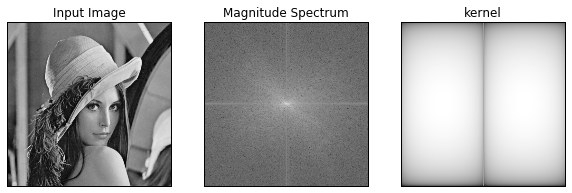

In [7]:
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(mgspec, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(kernmgspec, cmap = 'gray')
plt.title('kernel')
plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
fft_img.shape

(512, 512)

In [9]:
finalmg = mgspec * kernmgspec
finalfft = fshift * fkernshift

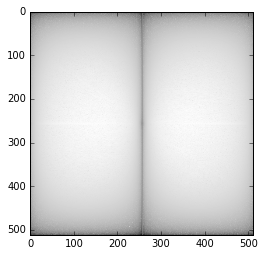

In [10]:
plt.imshow(finalmg,cmap = 'gray')
plt.show()

In [11]:
img_back = np.abs(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(finalfft))))
norm = img_back/np.max(img_back)

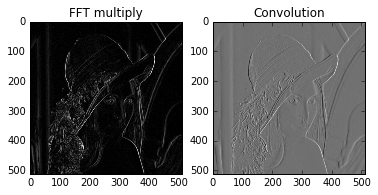

In [12]:
plt.subplot(121)
plt.imshow(norm,cmap = 'gray')
plt.title("FFT multiply")
plt.subplot(122)
plt.imshow(conv,cmap = 'gray')
plt.title("Convolution")
plt.show()

In [15]:
print norm

[[  7.07649580e-16   5.79710145e-03   5.53380968e-16 ...,   2.37681159e-01
    4.63768116e-02   1.97101449e-01]
 [  6.90105333e-16   5.79710145e-03   5.83445075e-16 ...,   2.37681159e-01
    4.63768116e-02   1.97101449e-01]
 [  6.91991038e-16   5.79710145e-03   5.82086641e-16 ...,   2.37681159e-01
    4.63768116e-02   1.97101449e-01]
 ..., 
 [  5.65217391e-02   6.08695652e-02   7.24637681e-03 ...,   8.69565217e-03
    3.52173913e-01   3.59420290e-01]
 [  4.49275362e-02   7.39130435e-02   7.40823695e-16 ...,   4.20289855e-02
    2.55072464e-01   2.28985507e-01]
 [  1.44927536e-02   2.75362319e-02   1.72691013e-16 ...,   1.72463768e-01
    5.36231884e-02   5.50724638e-02]]
